In [ ]:
from google.colab import files
from IPython.display import Image
import numpy as np

In [ ]:
uploaded = files.upload()

Saving 48025.jpg to 48025.jpg


<class 'numpy.ndarray'>
(321, 481, 3)


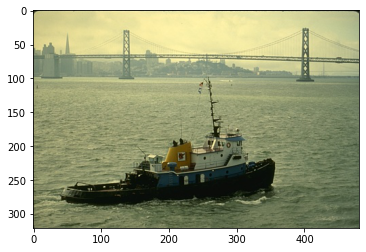

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread("48025.jpg")
print(type(img))
print(img.shape)
plt.imshow(img)

(321, 481)


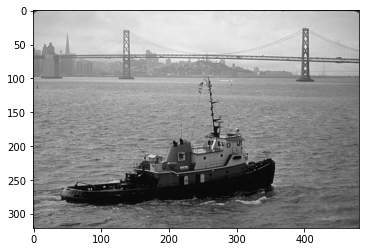

In [ ]:
[rows,cols,pages]=np.shape(img)
# Split image into seperate r g b channels
r=img[:,:,0]
g=img[:,:,1]
b=img[:,:,2]

# Create Greyscale Image (Even Ratio)
G_img=r/3+g/3+b/3

plt.imshow(G_img, cmap ='gray')
print(G_img.shape)

In [ ]:
# generate the Gaussian 5x5 kernel
# sigma = 1
def gaussian_kernel(size, sigma=1.4):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    N = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * N
    return g

In [ ]:
size = 5*5
G = gaussian_kernel(size, sigma=1.4)

In [ ]:
def convolution2d(image, kernel, bias):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
return new_image

In [ ]:
def Conv(img, kernel):
    kernel = kernel
    img_h = img.shape[0]
    img_w = img.shape[1]
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    img_conv = np.zeros(img.shape)
    
    for i in range(h,img_h -h):
        for j in range(w,img_w -w):
            S = 0
            for m in range(kernel_h):
                for n in range(kernel_w):
                    S = S + kernel[m][n] * image[i-h+m][j-w+n]
                    
            img_conv[i][j] = S
            
    return img_conv 

In [ ]:
def Conv_trans(image):
    Icopy = G_img.copy()
    for i in range(G_img.shape[0]):
        for j in range(G_img.shape[0]):
            Icopy[i][j] = G_img[G_img.shape[0]-i-1][G_img.shape[1]-j-1]
    return Icopy

def Conv(image,kernel):
    kernel = Conv_trans(kernel)
    image_h = image.shape[0]
    image_w = image.shape[1]
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image.shape)
    
    for i in range(h,image_h -h):
        for j in range(w,image_w -w):
            S = 0
            for m in range(kernel_h):
                for n in range(kernel_w):
                    S = S + kernel[m][n] * image[i-h+m][j-w+n]
                    
            image_conv[i][j] = S
            
    return image_conv        